In [ ]:
# Install the pycoco library as it is not part of the Kaggle environment
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [84]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import json
from pycocotools.coco import COCO
import skimage.io as io

In [85]:
# Define the load images function
def loadImages(LOC, COLOUR=None):
    file_lst = os.listdir(LOC)
    
    # Read the images as gray or coloured
    image_dct = {}
    for file in file_lst:
        loc = LOC + file
        if COLOUR == 'gray':
            img = cv2.imread(loc, 0)
        else:
            img = cv2.imread(loc)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
        
        # Save the images and their image ids into a dictionary
        image_dct[file[:6].strip('0')] = img
    
    # Read the json file into a coco indexer
    coco = COCO(LOC[:-7] + 'annotations.json')
        
    return image_dct, coco

In [86]:
# Load the image sets and their annotations
val_images_path = '../input/food-recognition-challenge/val-v0.4/val/images/'
train_images, train_coco = loadImages(val_images_path, 'gray')

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


### TO DO:
https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047

Link to website on guide to read the images with their annotations using the coco indexer ('train_coco'). Implement a function to preview images with their annotations.

In [87]:
# Path of file that contains annotations of validation images
val_annFile = '../input/food-recognition-challenge/val-v0.4/val/annotations.json'
# Initialize the COCO api for instance annotations
coco=COCO(val_annFile)
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Print all categories
nms=[cat['name'] for cat in cats]
print('There are', len(nms),'COCO categories: \n{}\n'.format(' '.join(nms)))

# Print supercategories
nms = set([cat['supercategory'] for cat in cats])
print('There is', len(nms),'COCO supercategory: \n{}'.format(' '.join(nms)))

# Print all categories in json format
#print(cats)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
There are 273 COCO categories: 
water pear egg grapes butter bread-white jam bread-whole-wheat apple tea-green white-coffee-with-caffeine tea-black mixed-salad-chopped-without-sauce cheese tomato-sauce pasta-spaghetti carrot onion beef-cut-into-stripes-only-meat rice-noodles-vermicelli salad-leaf-salad-green bread-grain espresso-with-caffeine banana mixed-vegetables bread-wholemeal savoury-puff-pastry wine-white dried-meat fresh-cheese red-radish hard-cheese ham-raw bread-fruit oil-vinegar-salad-dressing tomato cauliflower potato-gnocchi wine-red sauce-cream pasta-linguini-parpadelle-tagliatelle french-beans almonds dark-chocolate mandarine semi-hard-cheese croissant sushi berries biscuits thickened-cream-35 corn celeriac alfa-sprouts chickpeas leaf-spinach rice chocolate-cookies pineapple tart coffee-with-caffeine focaccia pizza-with-vegetables-baked soup-vegetable bread-toast potatoes-steamed spaetzle 

In [88]:
# Function that fetches a class name for a given id number
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

# Example
id_example = 1889
print('The class name of id {} is {}'.format(id_example, getClassName(id_example, cats)))

The class name of id 1889 is ham-cooked


In [93]:
# get all images containing given categories, select one at random
filterClasses = ['bread', 'butter', 'honey']
catIds = coco.getCatIds(catNms=filterClasses);
imgIds = coco.getImgIds(catIds=catIds);

print("Number of images containing classes {}: {}".format(filterClasses, len(imgIds)))

Number of images containing classes ['bread', 'butter', 'honey']: 1


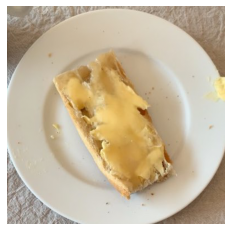

In [104]:
# load and display image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/{}'.format(val_images_path,img['file_name']))/255.0
#I = cv2.imread('{}/{}'.format(val_images_path,img['file_name']) , cv2.COLOR_BGR2RGB)/255.0
plt.imshow(I)
plt.axis('off')
plt.show()

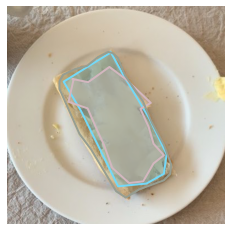

In [105]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)